In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# sns.set_theme(palette="bright")

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species_numeric'] = iris.target
df['species'] = df['species_numeric'].map(dict(enumerate(iris.target_names)))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_numeric,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
col_numeric = df.drop(columns=['species_numeric']).select_dtypes(include=['number']).columns.tolist()
print(col_numeric)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


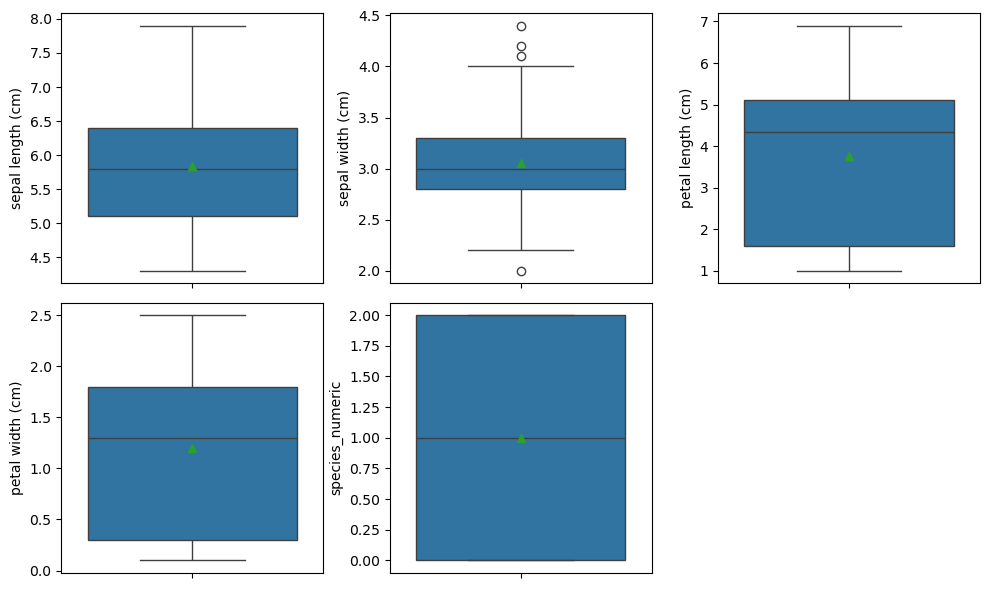

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i], showmeans=True)

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

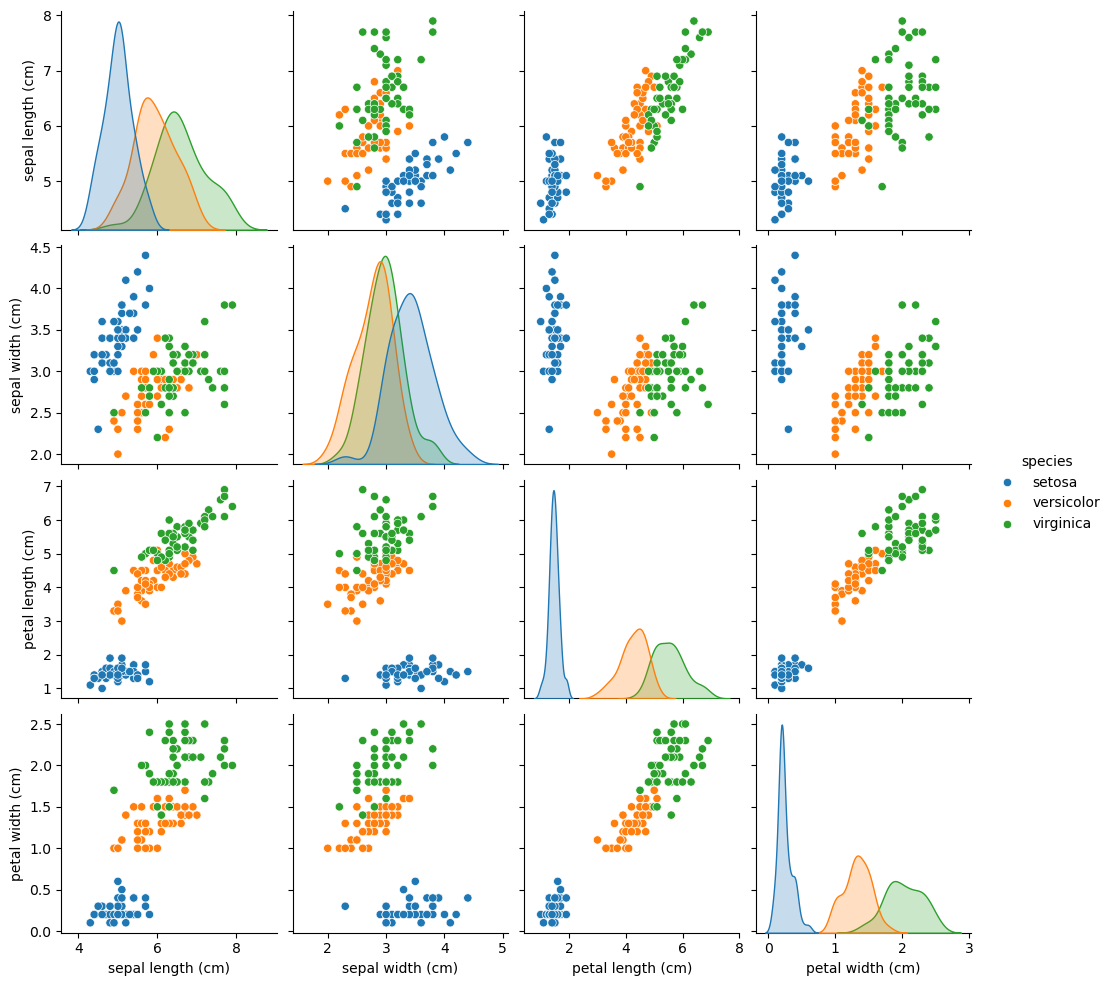

In [5]:
sns.pairplot(df.drop(columns=['species_numeric']), hue='species')

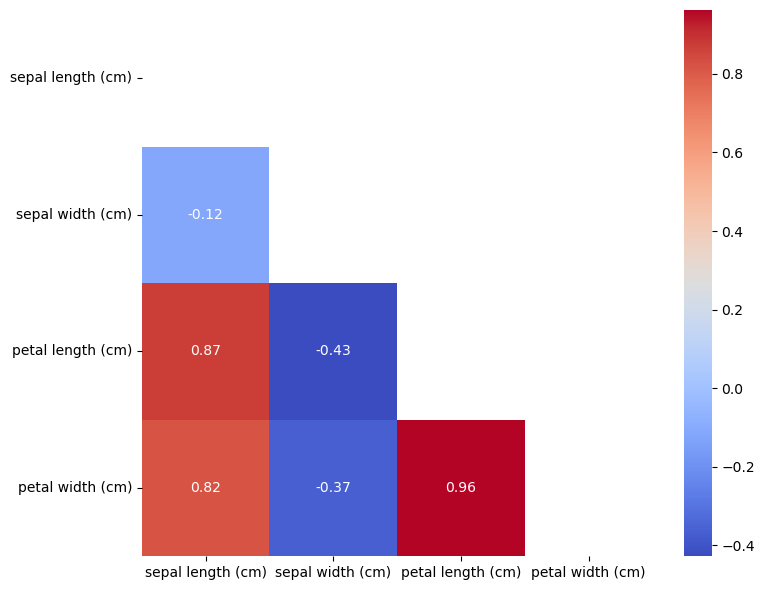

In [6]:
correl_matrix = np.triu(df[col_numeric].corr())

fig, ax = plt.subplots(figsize=(8, 6))
axes = axes.flatten()

sns.heatmap(df[col_numeric].corr(), mask=correl_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

plt.tight_layout()
plt.show()